In [18]:
import numpy as np
from ppopt.mplp_program import MPLP_Program
from ppopt.mpmodel import MPModeler
from ppopt.mp_solvers.solve_mpqp import solve_mpqp, mpqp_algorithm
from ppopt.plot import parametric_plot
from numpy.polynomial.legendre import leggauss
from scipy.optimize import linprog
from typing import Union
from collections import defaultdict

In [19]:
# Pistikopoulos and Mazzuchi (1990) Example 1
t_bounds = [(610, 630), (378, 398), (573, 593), (303, 323)]
# t_bounds = [(586.68, 653.32), (354.68, 421.32), (549.68, 616.32), (279.68, 346.32)]
nt = len(t_bounds)
nd = 0
d_bounds = None
d_vector = None
m = MPModeler()

t3_max = m.add_var('t3_max')
t3_min = m.add_var('t3_min')
t4_a = m.add_var('t4_a')
t4_b = m.add_var('t4_b')

t1 = m.add_param(name="t1")
t2 = m.add_param(name="t2")

# m.add_constr(-1/3*t3_max + t4_a - (125 + 1/3) <= 0)
# m.add_constr(-3/7*t1 - 1/7*t2 - 4/7*t3_max + (643 + 3/7) <= 0)
# m.add_constr(1/2*t4_a - (161 + 1/2) <= 0)
# m.add_constr(-3/5*t1 - 1/5*t2 - 2/5*t3_max - 4/5*t4_a + 922 <= 0)
# 
# m.add_constr(-1/3*t3_min + t4_b - (125 + 1/3) <= 0)
# m.add_constr(-3/7*t1 - 1/7*t2 - 4/7*t3_min + (643 + 3/7) <= 0)
# m.add_constr(1/2*t4_b - (161 + 1/2) <= 0)
# m.add_constr(-3/5*t1 - 1/5*t2 - 2/5*t3_min - 4/5*t4_b + 922 <= 0)

m.add_constr(-0.5*t3_max + 1.5*t4_a - 188 <= 0)
m.add_constr(-0.75*t1 - 0.25*t2 - t3_max + 1126 <= 0)
m.add_constr(0.5*t4_a - 161.5 <= 0)
m.add_constr(-0.75*t1 - 0.25*t2 - 0.5*t3_max - t4_a + 1152.5 <= 0)

m.add_constr(-0.5*t3_min + 1.5*t4_b - 188 <= 0)
m.add_constr(-0.75*t1 - 0.25*t2 - t3_min + 1126 <= 0)
m.add_constr(0.5*t4_b - 161.5 <= 0)
m.add_constr(-0.75*t1 - 0.25*t2 - 0.5*t3_min - t4_b + 1152.5 <= 0)

m.add_constr(t3_min <= t3_max)

m.add_constr(t_bounds[2][0] <= t3_max)
m.add_constr(t_bounds[2][0] <= t3_min)
m.add_constr(t_bounds[3][0] <= t4_a)
m.add_constr(t_bounds[3][0] <= t4_b)
m.add_constr(t3_max <= t_bounds[2][1])
m.add_constr(t3_min <= t_bounds[2][1])
m.add_constr(t4_a <= t_bounds[3][1])
m.add_constr(t4_b <= t_bounds[3][1])

m.add_constr(t_bounds[0][0] <= t1)
m.add_constr(t_bounds[1][0] <= t2)
m.add_constr(t1 <= t_bounds[0][1])
m.add_constr(t2 <= t_bounds[1][1])
m.set_objective(t3_min-t3_max)
prob = m.formulate_problem()
prob.process_constraints()

solution_flexibility = solve_mpqp(problem=prob, algorithm=mpqp_algorithm.geometric)

def joint_pdf(theta:list):
    return (1/(5000*np.pi))*np.exp(-0.08*((theta[0]-620)**2 + (theta[1]-388)**2))

Using a found active set [10, 11, 12, 13]


In [20]:
prob.A

array([[-0.31622777,  0.        ,  0.9486833 ,  0.        ],
       [-0.78446454,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [-0.36514837,  0.        , -0.73029674,  0.        ],
       [ 0.        , -0.31622777,  0.        ,  0.9486833 ],
       [ 0.        , -0.78446454,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        , -0.36514837,  0.        , -0.73029674],
       [-0.70710678,  0.70710678,  0.        ,  0.        ],
       [-1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -1.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.

In [21]:
prob.b

array([[ 118.90164002],
       [-883.30707266],
       [ 323.        ],
       [-841.6669967 ],
       [ 118.90164002],
       [-883.30707266],
       [ 323.        ],
       [-841.6669967 ],
       [  -0.        ],
       [-573.        ],
       [-573.        ],
       [-303.        ],
       [-303.        ],
       [ 593.        ],
       [ 593.        ],
       [ 323.        ],
       [ 323.        ]])

In [22]:
prob.F

array([[0.        , 0.        ],
       [0.58834841, 0.19611614],
       [0.        , 0.        ],
       [0.54772256, 0.18257419],
       [0.        , 0.        ],
       [0.58834841, 0.19611614],
       [0.        , 0.        ],
       [0.54772256, 0.18257419],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [23]:
prob.A_t

array([[-1.,  0.],
       [ 0., -1.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [24]:
prob.b_t

array([[-610.],
       [-378.],
       [ 630.],
       [ 398.]])

In [25]:
prob.c

array([[-1.],
       [ 1.],
       [ 0.],
       [ 0.]])

In [26]:
prob.H

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [27]:
prob.Q_t

array([[0., 0.],
       [0., 0.]])

In [28]:
prob.c_t

array([[0.],
       [0.]])

In [29]:
prob.c_c

array(0.)

In [30]:
solution_flexibility

Solution(program=<ppopt.mplp_program.MPLP_Program object at 0x00000202ECB621A0>, critical_regions=[Critical region with active set [10, 11, 12, 13]
The Omega Constraint indices are [1, 2, 3]
The Lagrange multipliers Constraint indices are []
The Regular Constraint indices are [[7], [7]]
  x(θ) = Aθ + b 
 λ(θ) = Cθ + d 
  Eθ <= f
 A = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 
 b = [[593.]
 [573.]
 [303.]
 [303.]] 
 C = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 
 d = [[1.]
 [0.]
 [0.]
 [1.]] 
 E = [[-0.9486833  -0.31622777]
 [ 0.         -1.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]] 
 f = [[-712.14492907]
 [-378.        ]
 [ 630.        ]
 [ 398.        ]], Critical region with active set [4, 10, 11, 13]
The Omega Constraint indices are [0, 1, 2, 3]
The Lagrange multipliers Constraint indices are []
The Regular Constraint indices are [[3, 4], [3, 5]]
  x(θ) = Aθ + b 
 λ(θ) = Cθ + d 
  Eθ <= f
 A = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 
 b = [[593.        ]
 [573.        ]
 [3

In [31]:
theta = np.array([610.39710144, 378.39710144])

In [32]:
r = solution_flexibility.get_region(theta_point=theta)

In [33]:
print(r)

Critical region with active set [0, 2, 4, 5]
The Omega Constraint indices are [0, 1]
The Lagrange multipliers Constraint indices are []
The Regular Constraint indices are [[6], [10]]
  x(θ) = Aθ + b 
 λ(θ) = Cθ + d 
  Eθ <= f
 A = [[ 0.          0.        ]
 [-0.75       -0.25      ]
 [ 0.          0.        ]
 [-0.25       -0.08333333]] 
 b = [[ 593.        ]
 [1126.        ]
 [ 323.        ]
 [ 500.66666667]] 
 C = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 
 d = [[-3.16227766]
 [ 3.        ]
 [ 0.        ]
 [ 1.27475488]] 
 E = [[ 0.9486833   0.31622777]
 [-1.          0.        ]
 [ 0.         -1.        ]] 
 f = [[ 699.49581843]
 [-610.        ]
 [-378.        ]]


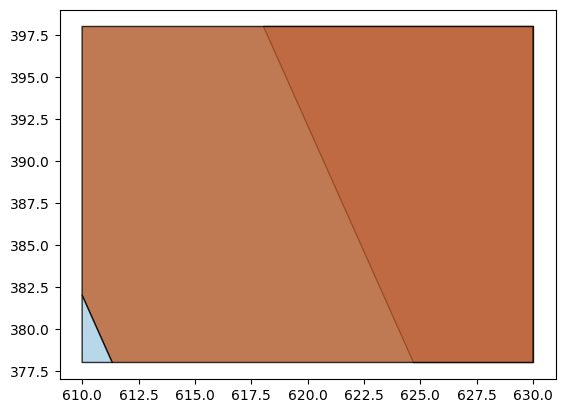

In [34]:
parametric_plot(solution_flexibility)